# [线性回归](http://coldjune.com/2018/05/25/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/)

## [正规方程](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note2.pdf)

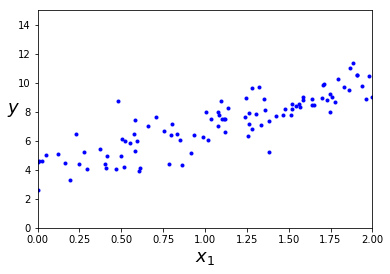

In [1]:
# 构建类线性数据
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [2]:
#使用正规方程计算theta
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.97963397],
       [2.98594391]])

In [3]:
# 使用theta进行预测
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.97963397],
       [9.95152178]])

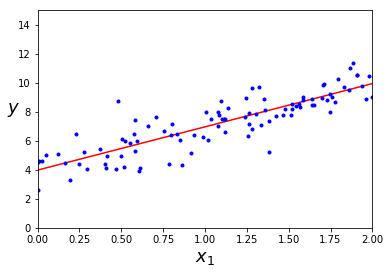

In [4]:
# 画出预测函数
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
# 使用sklearn库的LinearRegression预测
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97963397]), array([[2.98594391]]))

In [6]:
lin_reg.predict(X_new)

array([[3.97963397],
       [9.95152178]])

# [梯度下降](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note2.pdf)

* 梯度下降
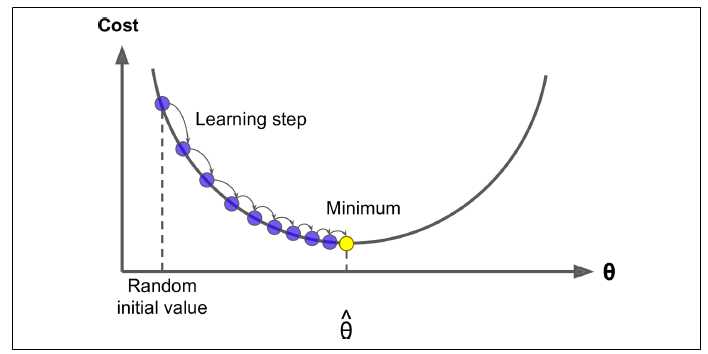

* 学习速率过小
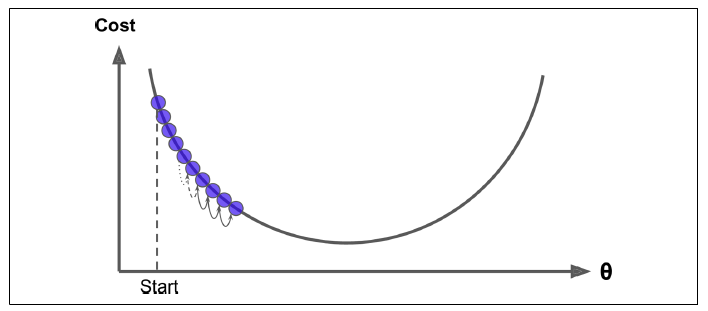

* 学习速率过大
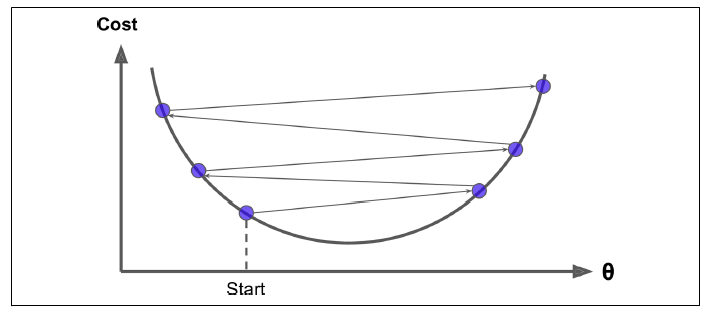

* 梯度下降陷阱
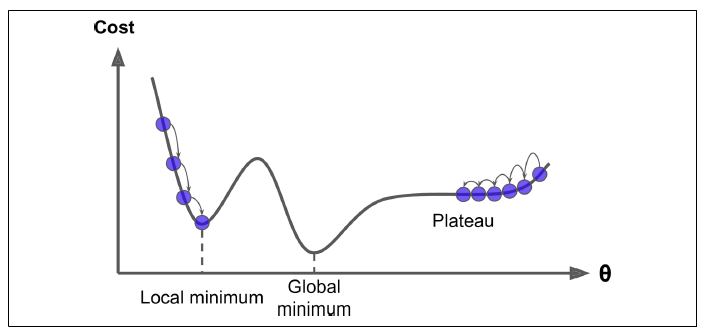

## [批量梯度下降](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note10.pdf)

In [7]:
eta = 0.1#学习速率
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.97963397],
       [2.98594391]])

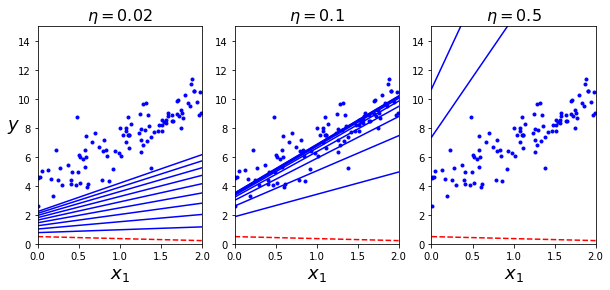

In [8]:
# 画出不同学习速率的拟合过程
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

## [随机梯度下降](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note10.pdf)

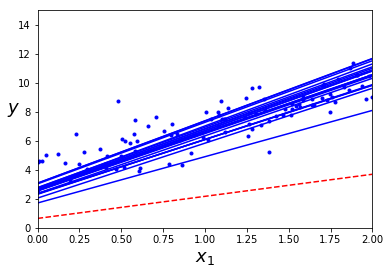

array([[3.94377661],
       [2.97561711]])

In [9]:
# 实现
theta_path_bgd = []
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i<20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)    
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        theta_path_bgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
theta

In [10]:
#使用sklearn的梯度下降
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

e:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96293115]), array([2.9698392]))

# [多项式回归](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note2.pdf)

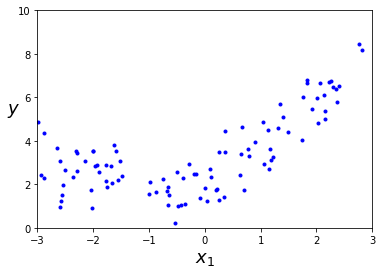

In [12]:
# 构建数据集
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


In [13]:
#为特征添加指数
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.15290063])

In [14]:
X_poly[0]

array([2.15290063, 4.63498111])

(array([2.28405711]), array([[0.88171323, 0.44446033]]))

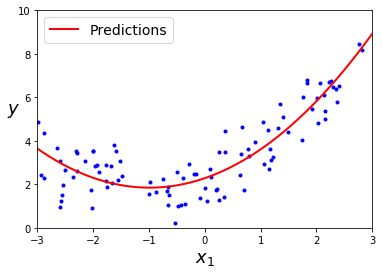

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

lin_reg.intercept_, lin_reg.coef_


# [学习曲线](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note6.pdf)

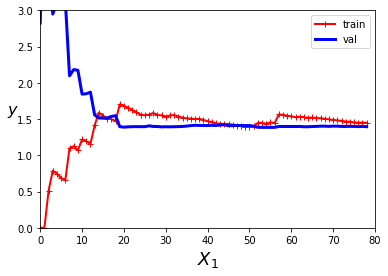

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("$X_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=16)
    plt.axis([0,80,0,3])
    plt.legend(loc="upper right")
    

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

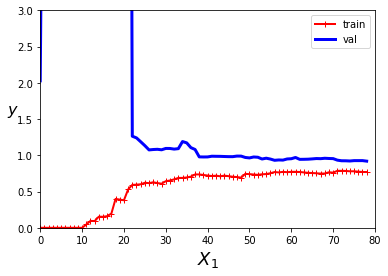

In [17]:
# 使用管道
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))
plot_learning_curves(polynomial_regression, X, y)

# 正规化线性模型

## [岭回归](http://coldjune.com/2018/05/25/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/#%E5%B2%AD%E5%9B%9E%E5%BD%92)

In [18]:
# 使用sklearn的Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.66784461]])

In [19]:
sgd_reg = SGDRegressor(max_iter=300,tol=1e-3,penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.65328865])

## [Lasso回归](http://coldjune.com/2018/05/25/线性回归/#lasso)

In [20]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.61400886])

## 弹性网络

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.62211027])

## 及时停止

In [22]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(warm_start=True, penalty=None, max_iter=300,
                      learning_rate="constant", eta0=0.0005, tol=1e-3)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
epoch, sgd_reg

(999,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=300,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
        verbose=0, warm_start=True))

# [逻辑回归](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note3.pdf)

In [24]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [25]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

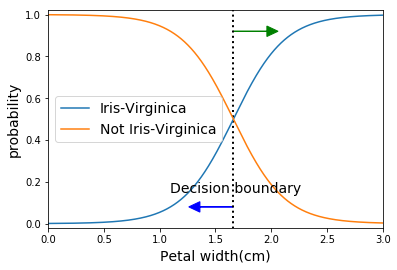

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width(cm)", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [34]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# [多项逻辑回归](https://github.com/coldJune/machineLearning/blob/master/machineLearningCourseraNote/Note3.pdf)

In [35]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [36]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
softmax_reg.predict([[5,2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# 练习

12

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
X_bias = np.c_[np.ones([X.shape[0],1]), X]

In [11]:
# 划分测试集、交叉验证集、训练集
test_ratio = 0.2
val_ratio = 0.2
total = X_bias.shape[0]

test_size = int(total*test_ratio)
val_size = int(total*val_ratio)
training_size = total - test_size - val_size

rnd_index = np.random.permutation(total)

X_train = X_bias[rnd_index[:training_size]]
y_train = y[rnd_index[:training_size]]

X_val = X_bias[rnd_index[training_size:-test_size]]
y_val = y[rnd_index[training_size:-test_size]]

X_test = X_bias[rnd_index[-test_size:]]
y_test = y[rnd_index[-test_size:]]

In [27]:
def one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    y_one_hot = np.zeros((m, n_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

In [28]:
one_hot(y_train[:10])

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [29]:
y_train_one_hot = one_hot(y_train)
y_val_one_hot = one_hot(y_val)
y_test_one_hot = one_hot(y_test)

In [33]:
def softmax(logits):
    exps = np.exp(logits)
    su = np.sum(exps, axis=1, keepdims=True)
    return exps/su

In [34]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [35]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    loss = - np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    error = y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    theta -= eta * gradients

0 2.9643713872246122
500 0.7165517559437957
1000 0.6197627100329675
1500 0.5554147252318663
2000 0.5094732977319119
2500 0.47470974440254754
3000 0.4472217378766739
3500 0.4247560841467186
4000 0.40592500289120065
4500 0.3898246627438488
5000 0.37583839275780795


In [36]:
theta

array([[ 3.50001501, -0.01072383, -2.75440308],
       [-0.49173452,  0.36192095,  0.20701467],
       [-2.56503086, -0.72271703,  1.48314085]])

In [37]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9333333333333333

In [46]:
eta = 0.1
n_iterations = 5001
m = X_train.shape[0]
epsilon = 1e-7
alpha = 0.1

theta = np.random.randn(n_inputs, n_outputs)
for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha*l2_loss
    error = y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha*theta[1:]]
    theta -= eta*gradients

0 1.4708800086431875
500 0.5505064592382145
1000 0.5181840455225201
1500 0.5087309255042669
2000 0.505177566705749
2500 0.503724848210578
3000 0.5031056782226953
3500 0.5028354251824597
4000 0.5027157418853732
4500 0.5026622504168033
5000 0.5026382003579435


In [47]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9666666666666667

In [55]:
eta = 0.1
n_iterations = 50001
m = X_train.shape[0]
epsilon = 1e-7
alpha = 0.1
best_loss = np.Infinity

theta = np.random.randn(n_inputs, n_outputs)
for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha*theta[1:]]
    theta -= eta*gradients
    
    logits = X_val.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_val_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha*l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration-1, best_loss)
        print(iteration, loss, 'stopping')
        break

0 2.6109592938714483
500 0.5316581958454109
1000 0.4896043639858638
1500 0.47724911659279445
2000 0.4726721367165236
2500 0.470829100245833
3000 0.47005546552579436
3500 0.46972348898268257
4000 0.46957957817941454
4500 0.4695171222095034
5000 0.46949022457356426
5500 0.46947885754395274
6000 0.4694742271498815
6500 0.4694724716242249
7000 0.46947190552116236
7472 0.469471803301064
7473 0.4694718033015315 stopping


In [56]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9666666666666667